# Data Preparing

In [20]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

In [2]:
#raw data
with open('nkis.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
#upload trained model
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
model = Doc2Vec.load('test')  # you can continue training with the loaded model!

In [4]:
#uploading vectors
emb_vectors = np.array([model.docvecs[i] for i in range(model.docvecs.count)])
print("The number of documents is ",len(emb_vectors))
print("The dimension of embedded vectors is", len(emb_vectors[0]))

The number of documents is  21397
The dimension of embedded vectors is 200


In [18]:
#'등록기관'
data['등록기관'][0:5]

0    과학기술정책연구원
1    과학기술정책연구원
2    과학기술정책연구원
3    과학기술정책연구원
4    과학기술정책연구원
Name: 등록기관, dtype: object

# LDA

In [16]:
#LDA dimension reduction
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = emb_vectors
y = list(data['등록기관'])
clf = LinearDiscriminantAnalysis(n_components=2)
X_lda=clf.fit_transform(X, y)

In [52]:
unique_affiliation_classified =['한국형사정책연구원','한국법제연구원','KDI국제정책대학원','대외경제정책연구원', '통일연구원','건축도시공간연구소', '한국교통연구원',  '국토연구원', '에너지경제연구원','한국해양수산개발원', '한국농촌경제연구원','한국환경정책·평가연구원','과학기술정책연구원', '정보통신정책연구원','산업연구원','한국개발연구원', '한국조세재정연구원','한국노동연구원','한국직업능력개발원', '한국교육개발원','한국교육과정평가원','한국청소년정책연구원', '육아정책연구소', '한국여성정책연구원', '한국보건사회연구원','경제·인문사회연구회', '한국행정연구원']
print(len(unique_affiliation_classified))
unique_affiliation_classified_eng_abb=['KIC','KLRI','KDI School','KIEP','KINU','AURI','KOTI','KRIHS','KEEI','KMI','KREI','KEI','STEPI','KISDI','KIET','KDI','KIPF','KLI','KRIVET','KEDI','KICE','NYPI','KICCE','KWDI','KIHASA','NRC','KIPA']
print(len(unique_affiliation_classified_eng_abb))

27
27


In [46]:
#각 기관의 paper index 모음
affiliation_list=np.array(list(data['등록기관']))
index_by_affiliation = {}
for affiliation in unique_affiliation_classified:
    index_by_affiliation[affiliation] = np.where(affiliation_list == affiliation)

(0.24705882352941178, 0.0, 0.49019607843137253, 1.0)
0
920
한국형사정책연구원
1
624
한국법제연구원
2
16660
KDI국제정책대학원
3
126
대외경제정책연구원
4
326
통일연구원
5
6802
건축도시공간연구소
6
520
한국교통연구원
7
69
국토연구원
8
280
에너지경제연구원
9
869
한국해양수산개발원
10
604
한국농촌경제연구원
11
948
한국환경정책·평가연구원
12
1
과학기술정책연구원
13
294
정보통신정책연구원
14
186
산업연구원
15
387
한국개발연구원
16
700
한국조세재정연구원
17
560
한국노동연구원
18
723
한국직업능력개발원
19
434
한국교육개발원
20
454
한국교육과정평가원
21
809
한국청소년정책연구원
22
5414
육아정책연구소
23
685
한국여성정책연구원
24
676
한국보건사회연구원
25
1750
경제·인문사회연구회
26
900
한국행정연구원


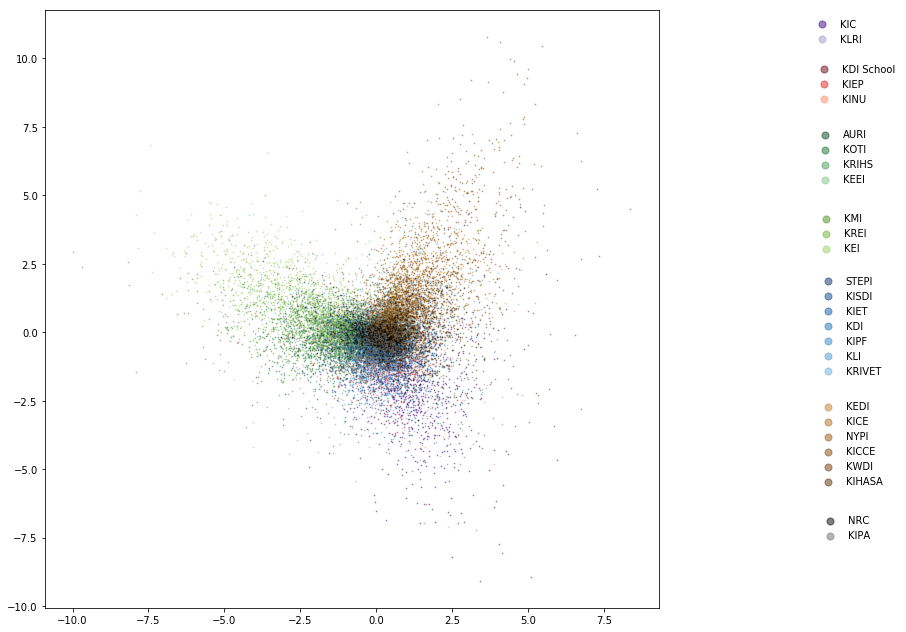

In [92]:
#plotting LDA reduced vector
plt.rcParams["figure.figsize"] = (11,11)

c_lst=[plt.cm.Purples(a) for a in np.linspace(1.0, 0.5, 2)]
c_lst=c_lst+[plt.cm.Reds(a) for a in np.linspace(1.0, 0.4, 3)]
c_lst=c_lst+[plt.cm.PRGn(a) for a in np.linspace(1.0, 0.75, 4)]
c_lst=c_lst+[plt.cm.PiYG(a) for a in np.linspace(0.9, 0.75, 3)]
c_lst=c_lst+[plt.cm.Blues(a) for a in np.linspace(1.0, 0.5,7 )]
c_lst=c_lst+[plt.cm.BrBG(a) for a in np.linspace(0.2, 0.0, 6)]
c_lst=c_lst+[plt.cm.Greys(a) for a in np.linspace(1.0, 0.65, 2)]

print(c_lst[0])

for i, name in enumerate(unique_affiliation_classified):
    xs = X_lda[index_by_affiliation[name]][:,0]
    ys = X_lda[index_by_affiliation[name]][:,1]
    print(i)
    if i==0:
        scatters=[plt.scatter(xs, ys, s=0.4,color=c_lst[i],label=name,alpha=0.5)]
    else:
        scatters = scatters+[plt.scatter(xs, ys, s=0.4,color=c_lst[i],label=name,alpha=0.5)]
    print(index_by_affiliation[name][0][1])
    print(name)
legend1 = plt.legend(handles=scatters[0:2],labels=unique_affiliation_classified_eng_abb[0:2],bbox_to_anchor=(1.346,1),frameon=False,loc='upper right')
# plt.gca().add_artist(legend1)
# # legend1.get_title().set_fontsize('14')
# legend1.get_frame().set_linewidth(10)         
plt.gca().add_artist(legend1)
legend2 = plt.legend(handles=scatters[2:5],labels=unique_affiliation_classified_eng_abb[2:5],bbox_to_anchor=(1.4, 0.925),frameon=False,loc='upper right')
# # legend2.get_title().set_fontsize('14')
plt.gca().add_artist(legend2)
legend3 = plt.legend(handles=scatters[5:9],labels=unique_affiliation_classified_eng_abb[5:9], bbox_to_anchor=(1.3635, 0.815),frameon=False,loc='upper right')
# # legend3.get_title().set_fontsize('14')
plt.gca().add_artist(legend3)
legend4 = plt.legend(handles=scatters[9:12],labels=unique_affiliation_classified_eng_abb[9:12], bbox_to_anchor=(1.353,0.675),frameon=False,loc='upper right')
plt.gca().add_artist(legend4)
# plt.gca().add_artist(legend4)
legend5 = plt.legend(handles=scatters[12:19],labels=unique_affiliation_classified_eng_abb[12:19], bbox_to_anchor=(1.3775,0.57),frameon=False,loc='upper right')
plt.gca().add_artist(legend5)
legend6 = plt.legend(handles=scatters[19:25],labels=unique_affiliation_classified_eng_abb[19:25], bbox_to_anchor=(1.381,0.36),frameon=False,loc='upper right')
plt.gca().add_artist(legend6)
legend7 = plt.legend(handles=scatters[25:27],labels=unique_affiliation_classified_eng_abb[25:27], bbox_to_anchor=(1.359,0.17),frameon=False,loc='upper right')

for point in legend1.legendHandles:
    point._sizes = [50]
    
for point in legend2.legendHandles:
    point._sizes = [50]
for point in legend3.legendHandles:
    point._sizes = [50]
for point in legend4.legendHandles:
    point._sizes = [50]
for point in legend5.legendHandles:
    point._sizes = [50]
for point in legend6.legendHandles:
    point._sizes = [50]
for point in legend7.legendHandles:
    point._sizes = [50]
plt.savefig('LDA.jpg')
plt.show()


# Finding Axis